## Exemples de machine learning : projet Seedbank

Pour voir des exemples de bout en bout des analyses interactives de machine learning rendues possibles par Colaboratory, découvrez le projet <a href="https://research.google.com/seedbank/">Seedbank</a>.

Voici quelques exemples :

- <a href="https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras">Transfert de style neuronal</a> : utiliser le deep learning pour transférer un style d'une image à une autre.
- <a href="https://research.google.com/seedbank/seed/ez_nsynth">EZ NSynth</a> : synthétiser des sons avec les auto-encodeurs WaveNet.
- <a href="https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus">Fashion MNIST avec Keras et TPU</a> : classer des images liées à la mode en utilisant le deep learning.
- <a href="https://research.google.com/seedbank/seed/deepdream">DeepDream</a> : produire des images DeepDream à partir de vos propres photos.
- <a href="https://research.google.com/seedbank/seed/convolutional_vae">Auto-encodeur variationnel convolutif</a> : créer un modèle génératif de chiffres manuscrits.

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
true_y_train=y_train.copy()
true_y_test=y_test.copy()
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Conv2D(32, (5,5), padding='same',
                 input_shape=x_train.shape[1:],name='conv1'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), name='maxpool1'))
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', name='conv3'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),name='conv4'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool2'))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, name='fcn1'))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, name='fcn2'))
model.add(Activation('softmax'))
print(model.summary())
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    log=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    log=model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 15, 15, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)   

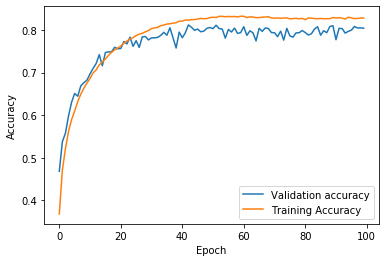

In [0]:
import matplotlib.pyplot as plt

ax1=plt.plot(log.history['val_acc'])
ax2=plt.plot(log.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend((ax1[0],ax2[0]),('Validation accuracy','Training Accuracy'))
plt.show()

In [0]:
from __future__ import print_function

import time
import numpy as np
from PIL import Image as pil_image
from keras.preprocessing.image import save_img
from keras import layers
from keras.applications import vgg16
from keras import backend as K


def normalize(x):
    """utility function to normalize a tensor.

    # Arguments
        x: An input tensor.

    # Returns
        The normalized input tensor.
    """
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())


def deprocess_image(x):
    """utility function to convert a float array into a valid uint8 image.

    # Arguments
        x: A numpy-array representing the generated image.

    # Returns
        A processed numpy-array, which could be used in e.g. imshow.
    """
    # normalize tensor: center on 0., ensure std is 0.25
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.25

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x


def process_image(x, former):
    """utility function to convert a valid uint8 image back into a float array.
       Reverses `deprocess_image`.

    # Arguments
        x: A numpy-array, which could be used in e.g. imshow.
        former: The former numpy-array.
                Need to determine the former mean and variance.

    # Returns
        A processed numpy-array representing the generated image.
    """
    if K.image_data_format() == 'channels_first':
        x = x.transpose((2, 0, 1))
    return (x / 255 - 0.5) * 4 * former.std() + former.mean()


def visualize_layer(model,
                    layer_name,
                    step=1.,
                    epochs=15,
                    upscaling_steps=9,
                    upscaling_factor=1.2,
                    output_dim=(412, 412),
                    filter_range=(0, None)):
    """Visualizes the most relevant filters of one conv-layer in a certain model.

    # Arguments
        model: The model containing layer_name.
        layer_name: The name of the layer to be visualized.
                    Has to be a part of model.
        step: step size for gradient ascent.
        epochs: Number of iterations for gradient ascent.
        upscaling_steps: Number of upscaling steps.
                         Starting image is in this case (80, 80).
        upscaling_factor: Factor to which to slowly upgrade
                          the image towards output_dim.
        output_dim: [img_width, img_height] The output image dimensions.
        filter_range: Tupel[lower, upper]
                      Determines the to be computed filter numbers.
                      If the second value is `None`,
                      the last filter will be inferred as the upper boundary.
    """

    def _generate_filter_image(input_img,
                               layer_output,
                               filter_index):
        """Generates image for one particular filter.

        # Arguments
            input_img: The input-image Tensor.
            layer_output: The output-image Tensor.
            filter_index: The to be processed filter number.
                          Assumed to be valid.

        #Returns
            Either None if no image could be generated.
            or a tuple of the image (array) itself and the last loss.
        """
        s_time = time.time()

        # we build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        if K.image_data_format() == 'channels_first':
            loss = K.mean(layer_output[:, filter_index, :, :])
        else:
            loss = K.mean(layer_output[:, :, :, filter_index])

        # we compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads = normalize(grads)

        # this function returns the loss and grads given the input picture
        iterate = K.function([input_img], [loss, grads])

        # we start from a gray image with some random noise
        intermediate_dim = tuple(
            int(x / (upscaling_factor ** upscaling_steps)) for x in output_dim)
        if K.image_data_format() == 'channels_first':
            input_img_data = np.random.random(
                (1, 3, intermediate_dim[0], intermediate_dim[1]))
        else:
            input_img_data = np.random.random(
                (1, intermediate_dim[0], intermediate_dim[1], 3))
        input_img_data = (input_img_data - 0.5) * 20 + 128

        # Slowly upscaling towards the original size prevents
        # a dominating high-frequency of the to visualized structure
        # as it would occur if we directly compute the 412d-image.
        # Behaves as a better starting point for each following dimension
        # and therefore avoids poor local minima
        for up in reversed(range(upscaling_steps)):
            # we run gradient ascent for e.g. 20 steps
            for _ in range(epochs):
                loss_value, grads_value = iterate([input_img_data])
                input_img_data += grads_value * step

                # some filters get stuck to 0, we can skip them
                if loss_value <= K.epsilon():
                    return None

            # Calculate upscaled dimension
            intermediate_dim = tuple(
                int(x / (upscaling_factor ** up)) for x in output_dim)
            # Upscale
            img = deprocess_image(input_img_data[0])
            img = np.array(pil_image.fromarray(img).resize(intermediate_dim,
                                                           pil_image.BICUBIC))
            input_img_data = np.expand_dims(
                process_image(img, input_img_data[0]), 0)

        # decode the resulting input image
        img = deprocess_image(input_img_data[0])
        e_time = time.time()
        print('Costs of filter {:3}: {:5.0f} ( {:4.2f}s )'.format(filter_index,
                                                                  loss_value,
                                                                  e_time - s_time))
        return img, loss_value

    def _draw_filters(filters, n=None):
        """Draw the best filters in a nxn grid.

        # Arguments
            filters: A List of generated images and their corresponding losses
                     for each processed filter.
            n: dimension of the grid.
               If none, the largest possible square will be used
        """
        if n is None:
            n = int(np.floor(np.sqrt(len(filters))))

        # the filters that have the highest loss are assumed to be better-looking.
        # we will only keep the top n*n filters.
        filters.sort(key=lambda x: x[1], reverse=True)
        filters = filters[:n * n]

        # build a black picture with enough space for
        # e.g. our 8 x 8 filters of size 412 x 412, with a 5px margin in between
        MARGIN = 5
        width = n * output_dim[0] + (n - 1) * MARGIN
        height = n * output_dim[1] + (n - 1) * MARGIN
        stitched_filters = np.zeros((width, height, 3), dtype='uint8')

        # fill the picture with our saved filters
        for i in range(n):
            for j in range(n):
                img, _ = filters[i * n + j]
                width_margin = (output_dim[0] + MARGIN) * i
                height_margin = (output_dim[1] + MARGIN) * j
                stitched_filters[
                    width_margin: width_margin + output_dim[0],
                    height_margin: height_margin + output_dim[1], :] = img

        # save the result to disk
        save_img('vgg_{0:}_{1:}x{1:}.png'.format(layer_name, n), stitched_filters)

    # this is the placeholder for the input images
    assert len(model.inputs) == 1
    input_img = model.inputs[0]

    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])

    output_layer = layer_dict[layer_name]
    assert isinstance(output_layer, layers.Conv2D)

    # Compute to be processed filter range
    filter_lower = filter_range[0]
    filter_upper = (filter_range[1]
                    if filter_range[1] is not None
                    else len(output_layer.get_weights()[1]))
    assert(filter_lower >= 0
           and filter_upper <= len(output_layer.get_weights()[1])
           and filter_upper > filter_lower)
    print('Compute filters {:} to {:}'.format(filter_lower, filter_upper))

    # iterate through each filter and generate its corresponding image
    processed_filters = []
    for f in range(filter_lower, filter_upper):
        img_loss = _generate_filter_image(input_img, output_layer.output, f)

        if img_loss is not None:
            processed_filters.append(img_loss)

    print('{} filter processed.'.format(len(processed_filters)))
    # Finally draw and store the best filters to disk
    _draw_filters(processed_filters)


# the name of the layer we want to visualize
# (see model definition at keras/applications/vgg16.py)
LAYER_NAME = 'conv2'

# build the VGG16 network with ImageNet weights


# example function call
visualize_layer(model, LAYER_NAME)

Compute filters 0 to 32
Costs of filter   4:    57 ( 0.74s )
Costs of filter   8:    11 ( 0.42s )
Costs of filter  14:     6 ( 0.41s )
Costs of filter  18:     9 ( 0.43s )
Costs of filter  24:    74 ( 0.46s )
Costs of filter  31:     6 ( 0.44s )
6 filter processed.


In [0]:
model.layers[1].name

'activation_1'

In [0]:
from sklearn.metrics import confusion_matrix
pred_test=model.predict_classes(x_test)
conf=confusion_matrix(true_y_test,pred_test)
print(conf)

[[865  10  26   9  18   3   5  14  20  30]
 [ 16 892   2   3   0   0   2   1  11  73]
 [ 58   2 671  18 100  37  66  25   6  17]
 [ 23   8  59 508 103 109 108  45  10  27]
 [ 10   2  27   9 844  13  49  42   3   1]
 [  7   6  38  74  53 695  46  62   2  17]
 [  5   1  18  13  28   7 917   3   4   4]
 [  6   0  16  16  34  23   6 885   3  11]
 [ 77  18   8   3   4   5   2   4 848  31]
 [ 28  29   3   1   1   0   2   7   9 920]]


In [0]:
import seaborn as sns
import numpy as np
import pandas as pd

In [0]:
a=[[865,10,26  ,  9,  18,   3,   5,  14,  20,  30,],
 [ 16, 892,   2,   3,   0,   0,   2,   1,  11,  73],
 [ 58,   2, 671,  18, 100,  37,  66,  25,   6,  17],
 [ 23,   8,  59, 508, 103, 109, 108,  45,  10,  27],
 [ 10,   2,  27,   9, 844,  13,  49,  42,   3,   1],
 [  7,   6,  38,  74,  53, 695,  46,  62,   2,  17],
 [  5,   1,  18,  13,  28,   7, 917,   3,  4,   4],
 [  6,   0 , 16,  16,  34,  23,   6, 885,   3,  11],
 [ 77,  18,   8,   3,   4,   5,   2,   4, 848,  31],
 [ 28,  29,   3,   1,   1,   0   ,2,   7,   9, 920]]
a=np.array(a)
a
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

df=pd.DataFrame(a, columns=names, index=names)
df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,865,10,26,9,18,3,5,14,20,30
automobile,16,892,2,3,0,0,2,1,11,73
bird,58,2,671,18,100,37,66,25,6,17
cat,23,8,59,508,103,109,108,45,10,27
deer,10,2,27,9,844,13,49,42,3,1
dog,7,6,38,74,53,695,46,62,2,17
frog,5,1,18,13,28,7,917,3,4,4
horse,6,0,16,16,34,23,6,885,3,11
ship,77,18,8,3,4,5,2,4,848,31
truck,28,29,3,1,1,0,2,7,9,920


In [0]:
a=[[459,  40,  47,  42,  73,  20,  64,  37, 160,  58],
 [ 60, 352,  26,  57,  41,  48,  83,  40, 101, 192],
 [ 99,  42, 122,  90, 250,  56, 215,  63,  27,  36],
 [ 54,  47,  67, 255,  88, 133, 187,  68,  36,  65],
 [ 48,  21,  63,  50, 422,  28, 238,  79,  29,  22],
 [ 40,  24,  74, 173,  87, 288, 150,  86,  31,  47],
 [ 21,  38,  50,  46, 150,  42, 565,  38,  10,  40],
 [ 50,  43,  43,  80, 161,  62,  97, 306,  52, 106],
 [150,  67,  16,  32,  44,  34,  52,  41, 482,  82],
 [ 66, 132,  11,  45,  40,  19,  71,  55, 103, 458]]

a=np.array(a)
a
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

df2=pd.DataFrame(a, columns=names, index=names)
df2

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,459,40,47,42,73,20,64,37,160,58
automobile,60,352,26,57,41,48,83,40,101,192
bird,99,42,122,90,250,56,215,63,27,36
cat,54,47,67,255,88,133,187,68,36,65
deer,48,21,63,50,422,28,238,79,29,22
dog,40,24,74,173,87,288,150,86,31,47
frog,21,38,50,46,150,42,565,38,10,40
horse,50,43,43,80,161,62,97,306,52,106
ship,150,67,16,32,44,34,52,41,482,82
truck,66,132,11,45,40,19,71,55,103,458


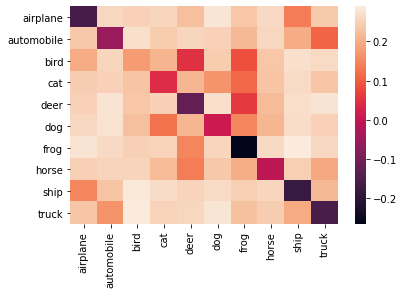

In [0]:
sns.heatmap(-df2/df2.sum(axis=1)+0.3,)


In [0]:
conf/conf.sum(axis=1)

array([[0.865, 0.01 , 0.026, 0.009, 0.018, 0.003, 0.005, 0.014, 0.02 ,
        0.03 ],
       [0.016, 0.892, 0.002, 0.003, 0.   , 0.   , 0.002, 0.001, 0.011,
        0.073],
       [0.058, 0.002, 0.671, 0.018, 0.1  , 0.037, 0.066, 0.025, 0.006,
        0.017],
       [0.023, 0.008, 0.059, 0.508, 0.103, 0.109, 0.108, 0.045, 0.01 ,
        0.027],
       [0.01 , 0.002, 0.027, 0.009, 0.844, 0.013, 0.049, 0.042, 0.003,
        0.001],
       [0.007, 0.006, 0.038, 0.074, 0.053, 0.695, 0.046, 0.062, 0.002,
        0.017],
       [0.005, 0.001, 0.018, 0.013, 0.028, 0.007, 0.917, 0.003, 0.004,
        0.004],
       [0.006, 0.   , 0.016, 0.016, 0.034, 0.023, 0.006, 0.885, 0.003,
        0.011],
       [0.077, 0.018, 0.008, 0.003, 0.004, 0.005, 0.002, 0.004, 0.848,
        0.031],
       [0.028, 0.029, 0.003, 0.001, 0.001, 0.   , 0.002, 0.007, 0.009,
        0.92 ]])

In [0]:
model.save('cnnmodel')

In [0]:
model.get_layer(name='conv1')